In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
# membaca dataset 
df = pd.read_csv("retailMarketingDI.csv")

# menampilkan sample data
df

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755.0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318.0
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296.0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436.0
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304.0
...,...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384.0
996,Middle,Male,Rent,Single,Far,40500,1,NaN,18,1073.0
997,Old,Male,Own,Single,Close,44800,0,Medium,24,1417.0
998,Middle,Male,Own,Married,Close,79000,2,Medium,18,671.0


# Data Cleaning

In [4]:
df.describe()

,Salary,Children,Catalogs,AmountSpent
count,1000.000000,1000.00000,1000.000000,994.000000
mean,55916.600000,0.93400,14.682000,1218.188129
std,30748.392284,1.05107,6.622895,961.849079
min,0.000000,0.00000,6.000000,0.000000
25%,29200.000000,0.00000,6.000000,490.250000
50%,53700.000000,1.00000,12.000000,962.500000
75%,76925.000000,2.00000,18.000000,1688.750000
max,168800.000000,3.00000,24.000000,6217.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age            1000 non-null object
Gender         1000 non-null object
OwnHome        1000 non-null object
Married        1000 non-null object
Location       1000 non-null object
Salary         1000 non-null int64
Children       1000 non-null int64
History        697 non-null object
Catalogs       1000 non-null int64
AmountSpent    994 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 78.2+ KB


In [6]:
df.dtypes

Age             object
Gender          object
OwnHome         object
Married         object
Location        object
Salary           int64
Children         int64
History         object
Catalogs         int64
AmountSpent    float64
dtype: object

In [7]:
# check missing values
df.isna().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      6
dtype: int64

### Dropping Unrelated Data

In [8]:
df = df.drop(['History'], axis=1)

In [9]:
df

,Age,Gender,OwnHome,Married,Location,Salary,Children,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,6,755.0
1,Middle,Male,Rent,Single,Close,63600,0,6,1318.0
2,Young,Female,Rent,Single,Close,13500,0,18,296.0
3,Middle,Male,Own,Married,Close,85600,1,18,2436.0
4,Middle,Female,Own,Single,Close,68400,0,12,1304.0
...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,18,384.0
996,Middle,Male,Rent,Single,Far,40500,1,18,1073.0
997,Old,Male,Own,Single,Close,44800,0,24,1417.0
998,Middle,Male,Own,Married,Close,79000,2,18,671.0


In [10]:
df.isna().sum()

Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
Catalogs       0
AmountSpent    6
dtype: int64

In [21]:
df.drop(index=df[df['AmountSpent'].isna()==True].index,inplace=True)

In [22]:
df.isna().sum()

Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
Catalogs       0
AmountSpent    0
dtype: int64

In [23]:
df['Catalogs'].unique()

array([ 6, 18, 12, 24])

In [33]:
df = df.drop(['Catalogs'], axis=1)
df

,Age,Gender,OwnHome,Married,Location,Salary,Children,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,755.0
1,Middle,Male,Rent,Single,Close,63600,0,1318.0
2,Young,Female,Rent,Single,Close,13500,0,296.0
3,Middle,Male,Own,Married,Close,85600,1,2436.0
4,Middle,Female,Own,Single,Close,68400,0,1304.0
...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,384.0
996,Middle,Male,Rent,Single,Far,40500,1,1073.0
997,Old,Male,Own,Single,Close,44800,0,1417.0
998,Middle,Male,Own,Married,Close,79000,2,671.0


Dropping catalogs because the data is unclear. I think it is a store specific item(s) so we cannot do further more for data explorarization

### EDA

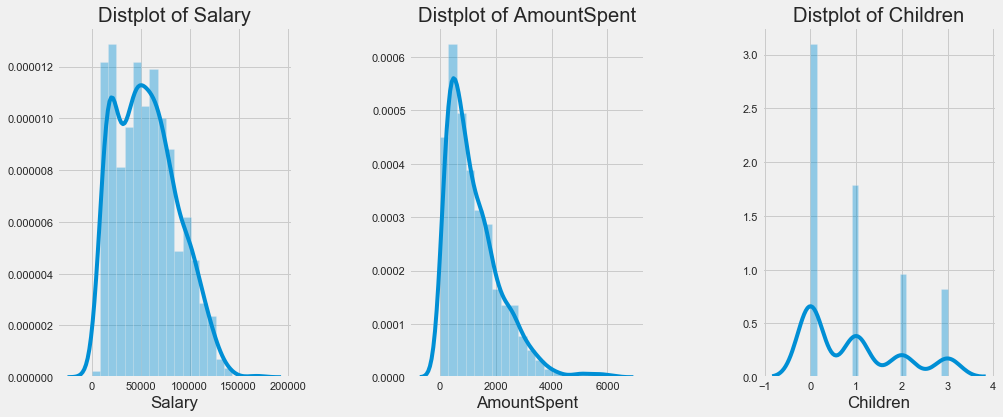

In [99]:
plt.style.use('fivethirtyeight')

plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Salary' , 'AmountSpent', 'Children']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

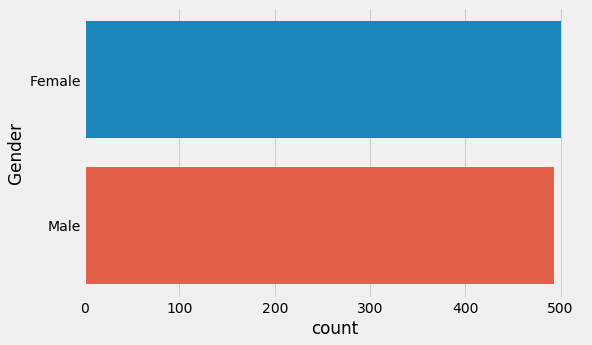

In [26]:
plt.figure(1 , figsize = (8 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

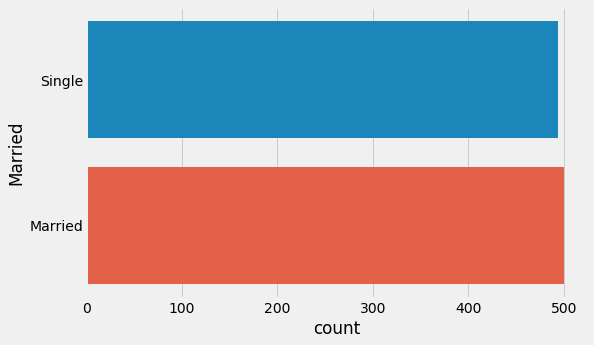

In [27]:
plt.figure(1 , figsize = (8 , 5))
sns.countplot(y = 'Married' , data = df)
plt.show()

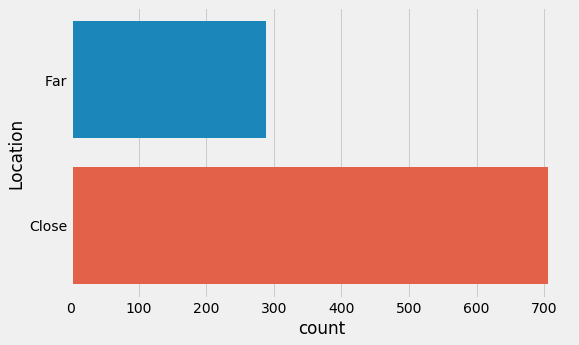

In [28]:
plt.figure(1 , figsize = (8 , 5))
sns.countplot(y = 'Location' , data = df)
plt.show()

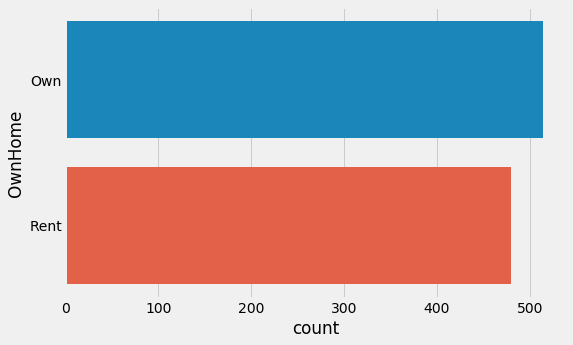

In [29]:
plt.figure(1 , figsize = (8 , 5))
sns.countplot(y = 'OwnHome' , data = df)
plt.show()

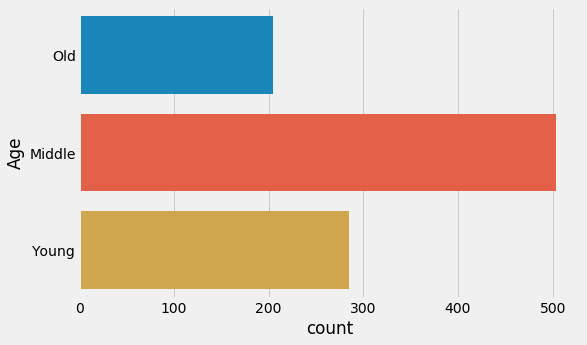

In [30]:
plt.figure(1 , figsize = (8 , 5))
sns.countplot(y = 'Age' , data = df)
plt.show()

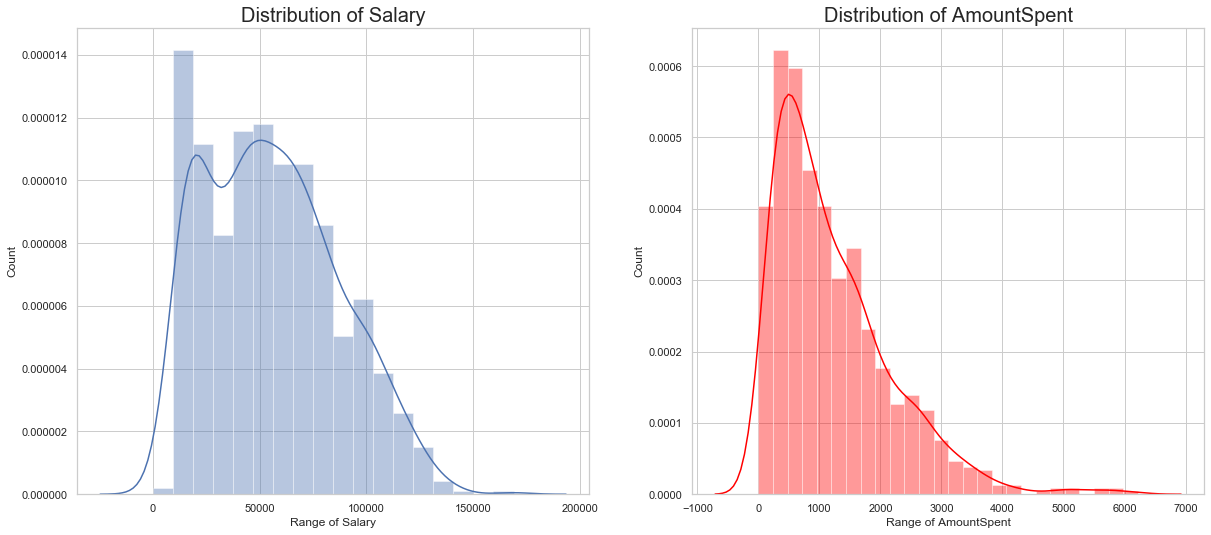

In [102]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Salary'])
plt.title('Distribution of Salary', fontsize = 20)
plt.xlabel('Range of Salary')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['AmountSpent'], color = 'red')
plt.title('Distribution of AmountSpent', fontsize = 20)
plt.xlabel('Range of AmountSpent')
plt.ylabel('Count')

plt.show()

In [34]:
df.corr()

,Salary,Children,AmountSpent
Salary,1.000000,0.044035,0.699703
Children,0.044035,1.000000,-0.222863
AmountSpent,0.699703,-0.222863,1.000000


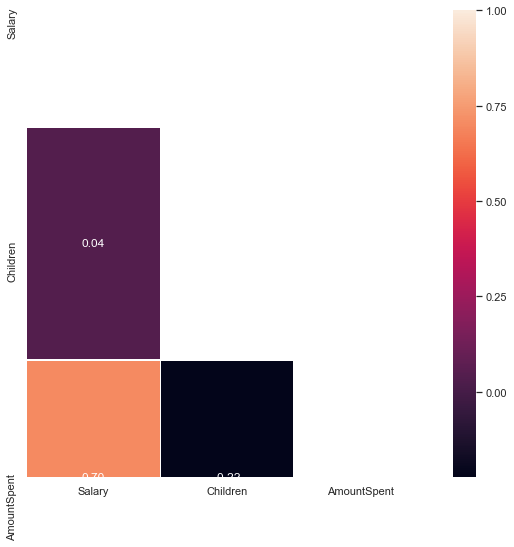

In [35]:
corr = df.corr()
fig, ax = plt.subplots(figsize= (8,8))
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr, linewidths = 0.5, annot=True, fmt = ".2f", mask = dropSelf)
plt.show()


In [36]:
df_c = df[['Age', 'Gender', 'OwnHome', 'Married', 'Location']]

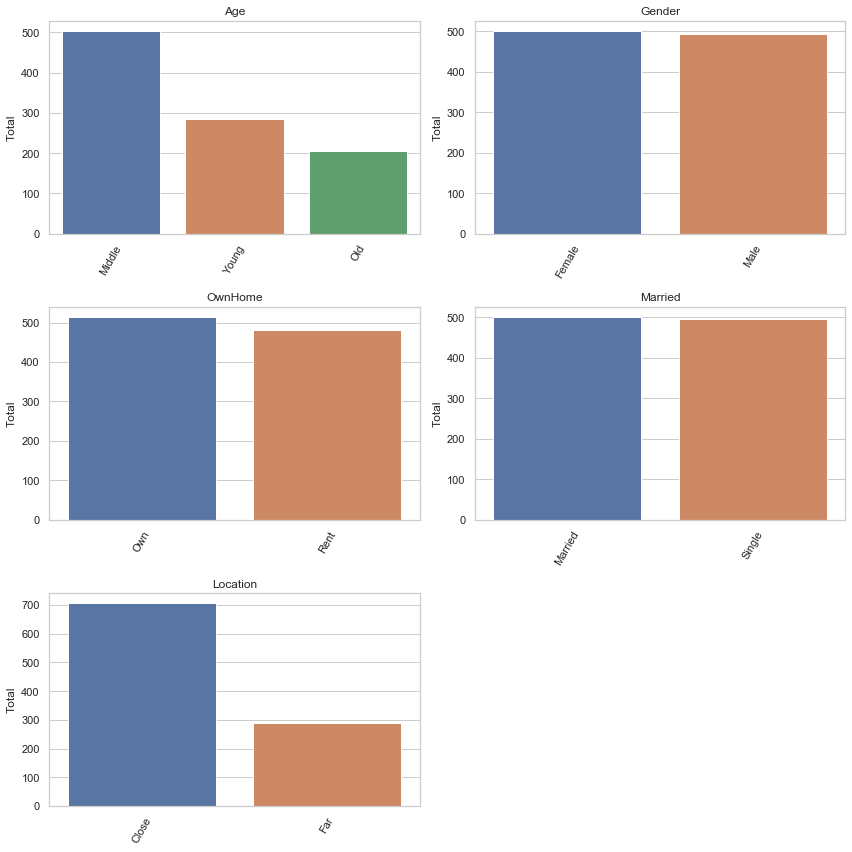

In [37]:
plt.figure(1, figsize = (12,12))
n = 0

for i in df_c.columns:
    n += 1
    plt.subplot(3, 2, n)
    cat_num = df_c[i].value_counts()
    title = cat_num.name
    cat_num.name = "Total"
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
    
    chart.y ="Total"
    plt.title(title)
    plt.tight_layout()
plt.tight_layout()
#     plt.show()

Text(0.5, 1.0, 'Credit Amount By Job and Marital Status')

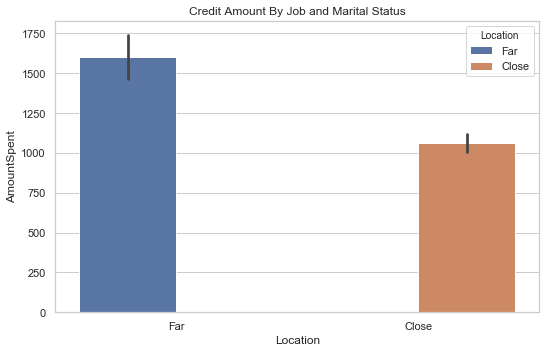

In [44]:
a = plt.figure( figsize = (17,17))
plt.subplot(3, 2, 2)
box = sns.barplot(x='Location',y='AmountSpent', hue= 'Location', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('Credit Amount By Job and Marital Status')

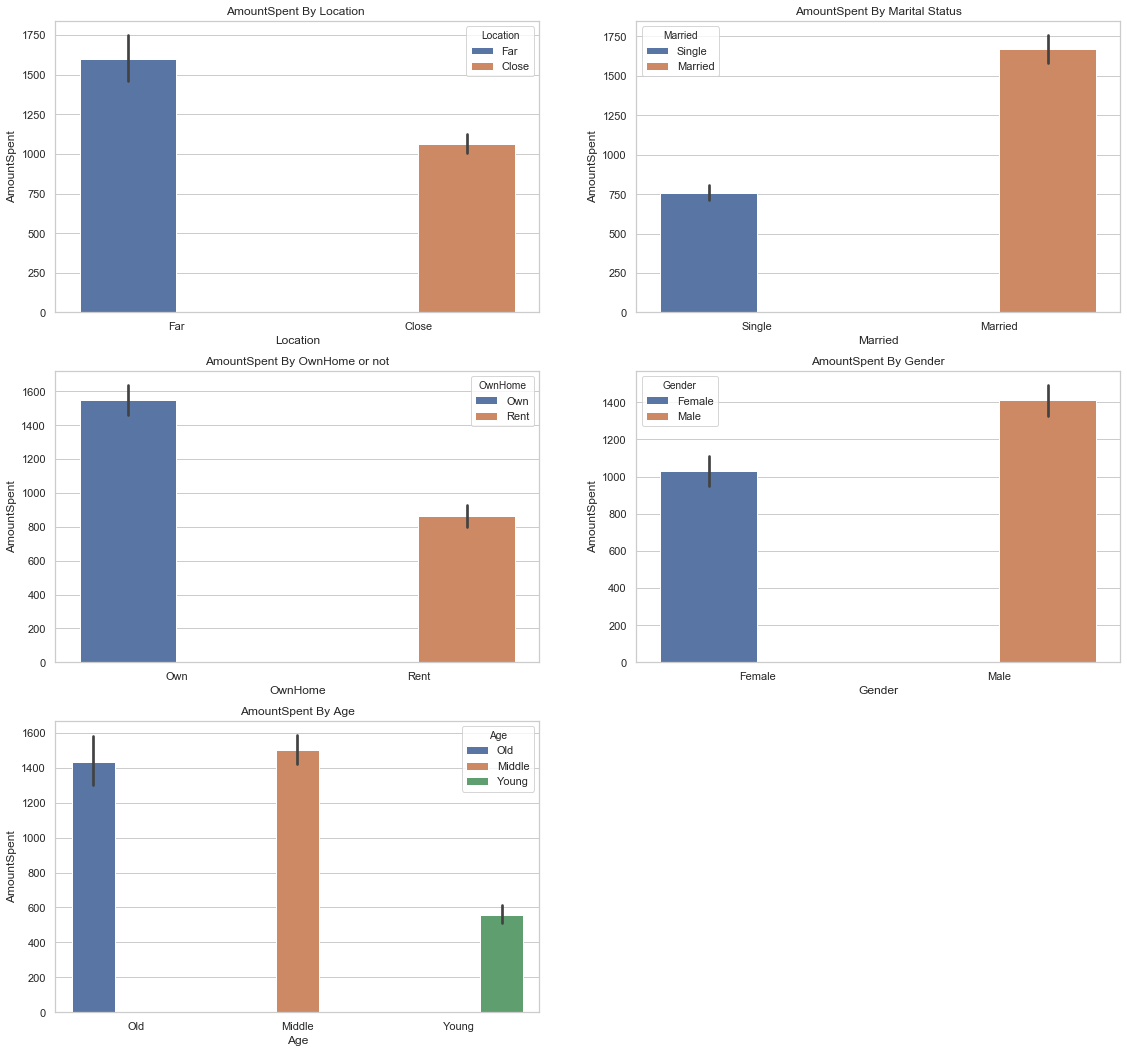

In [50]:
a = plt.figure( figsize = (17,17))

plt.subplot(3, 2, 1)
box = sns.barplot(x='Location',y='AmountSpent', hue= 'Location', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent By Location ')

plt.subplot(3, 2, 2)
box = sns.barplot(x='Married',y='AmountSpent', hue= 'Married', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent By Marital Status')

plt.subplot(3, 2, 3)
box = sns.barplot(x='OwnHome',y='AmountSpent', hue= 'OwnHome', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent By OwnHome or not')

plt.subplot(3, 2, 4)
box = sns.barplot(x='Gender',y='AmountSpent', hue= 'Gender', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent By Gender')

plt.subplot(3, 2, 5)
box = sns.barplot(x='Age',y='AmountSpent', hue= 'Age', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent By Age')


plt.tight_layout(pad=2, h_pad=3, w_pad=1, rect=(3,100,10,3))

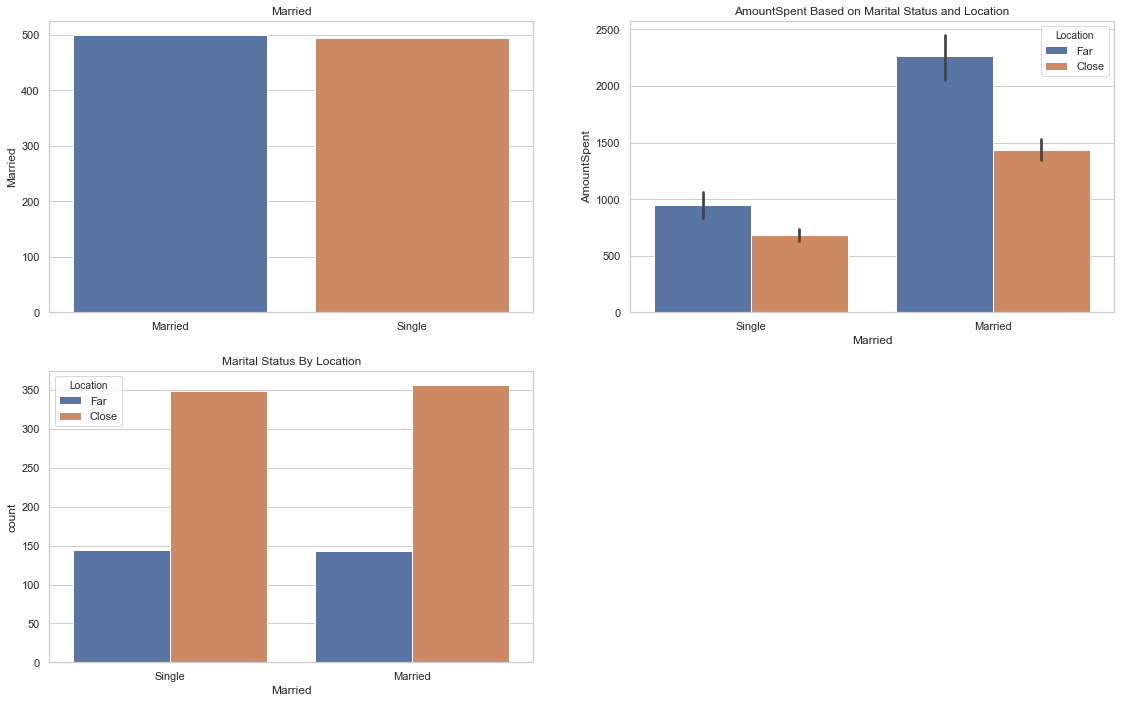

In [54]:
a = plt.figure( figsize = (17,17))

plt.subplot(3, 2, 1)
chart = sns.barplot(x=df_c['Married'].value_counts().index, y=df_c['Married'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Married')

plt.subplot(3, 2, 2)
box = sns.barplot(x='Married',y='AmountSpent', hue= 'Location', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent Based on Marital Status and Location')

plt.subplot(3, 2, 3)
sns.countplot('Married', data = df, hue = 'Location')
plt.title('Marital Status By Location')

plt.tight_layout(pad=2, h_pad=3, w_pad=1, rect=(3,100,10,3))

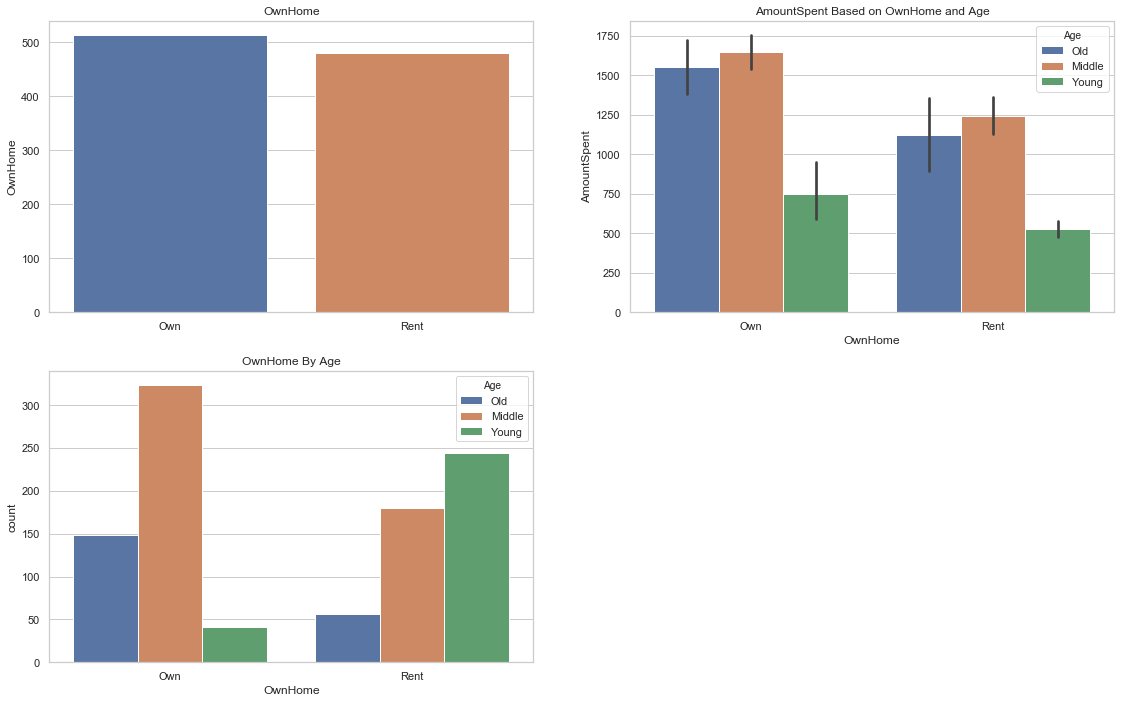

In [56]:
a = plt.figure( figsize = (17,17))

plt.subplot(3, 2, 1)
chart = sns.barplot(x=df_c['OwnHome'].value_counts().index, y=df_c['OwnHome'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('OwnHome')

plt.subplot(3, 2, 2)
box = sns.barplot(x='OwnHome',y='AmountSpent', hue= 'Age', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent Based on OwnHome and Age')

plt.subplot(3, 2, 3)
sns.countplot('OwnHome', data = df, hue = 'Age')
plt.title('OwnHome By Age')

plt.tight_layout(pad=2, h_pad=3, w_pad=1, rect=(3,100,10,3))

# Modeling

In [103]:
df_params = df[['Salary', 'AmountSpent','Children']]

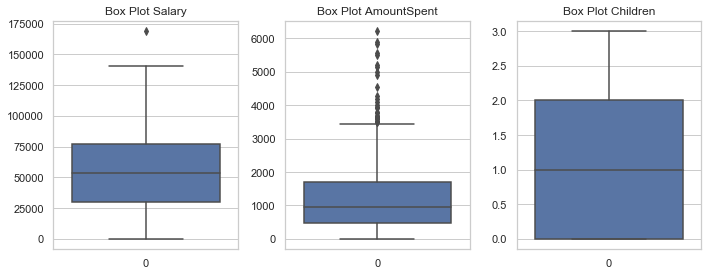

In [107]:
f, axes = plt.subplots(1, 3, figsize = (10,4))

sns.boxplot(data = df_params['Salary'], ax = axes[0]).set_title('Box Plot Salary')
sns.boxplot(data = df_params['AmountSpent'], ax = axes[1]).set_title('Box Plot AmountSpent')
sns.boxplot(data = df_params['Children'], ax = axes[2]).set_title('Box Plot Children')

plt.tight_layout()

In [109]:
from mahalanobis import Mahalanobis
from scipy.stats import chi2

In [110]:
df_params['mahala_pack'] = Mahalanobis(np.array(df_params),len(df_params)).distances

In [111]:
df_params['p-value'] = 1 - chi2.cdf(df_params['mahala_pack'], 2)

In [112]:
def name_outlier(col):
    if col < 0.01:
        return 'Outlier'
    else:
        return 'Not-outlier'
df_params['Out'] = df_params['p-value'].apply(name_outlier)

<Figure size 1800x1800 with 0 Axes>

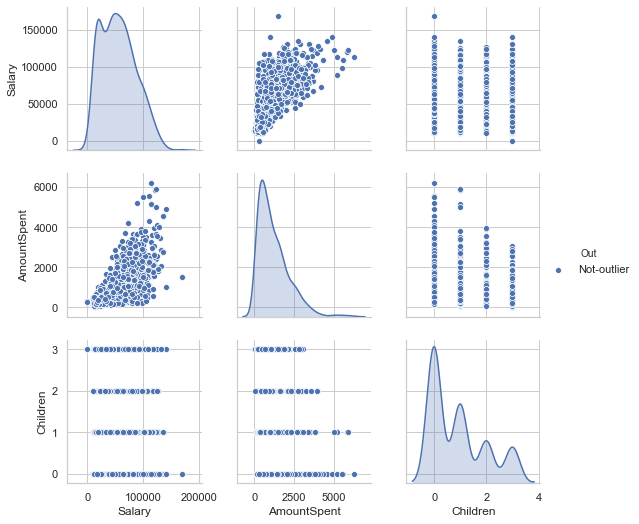

In [113]:
plt.figure( figsize = (25,25))

sns.pairplot(df_params[['Salary', 'AmountSpent', 'Children', 'Out']], hue = 'Out')

In [114]:
df[df_params['Out'] == 'Outlier']

,Age,Gender,OwnHome,Married,Location,Salary,Children,AmountSpent


### Scalling

In [115]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [116]:
df_params['Salary_scl'] = StandardScaler().fit_transform(df_params[['Salary']])
df_params['AmountSpent_scl'] = StandardScaler().fit_transform(df_params[['AmountSpent']])
df_params['Children_scl'] = StandardScaler().fit_transform(df_params[['Children']])
# df_num['Mortgage Scl'] = StandardScaler().fit_transform(df_num[['Mortgage']])

### K-Means Clustering

In [117]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [118]:
k = range(1, 10)
inertia = []

for i in k:
    model = KMeans(n_clusters = i)
    model.fit(df_params[['Salary_scl', 'AmountSpent_scl', 'Children_scl']])
    inertia.append(model.inertia_)
print(k)
print(inertia)

range(1, 10)
[2982.000000000001, 1834.1483927160486, 1223.4626084168394, 975.1094881345126, 783.8031925689294, 685.07395760811, 612.2485704485052, 551.1817852678807, 493.91502659861004]


Text(4, 600, 'Best K value = 3')

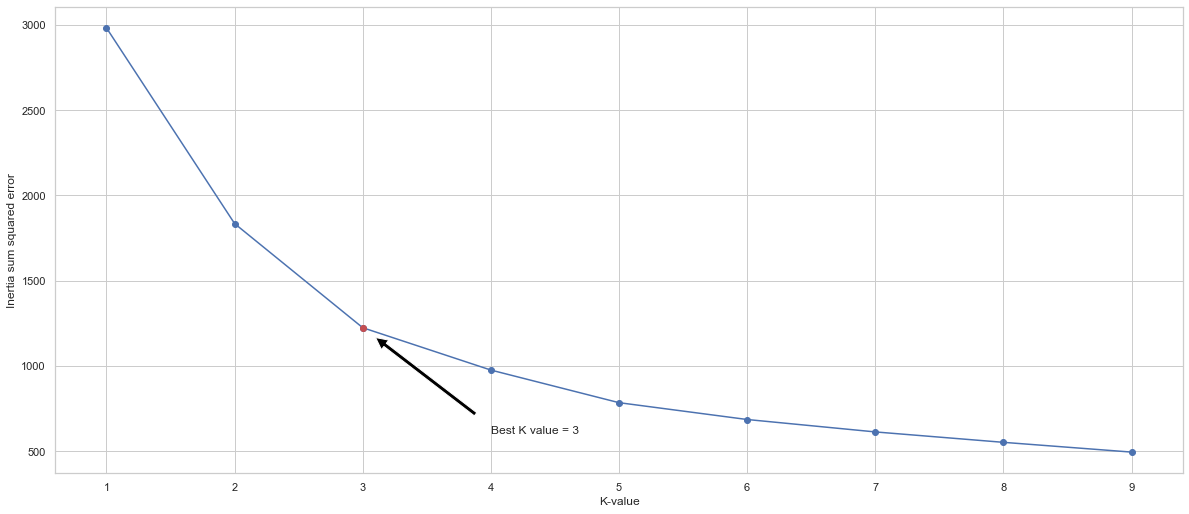

In [119]:
plt.plot(k, inertia, marker='o')
plt.xlabel('K-value')
plt.ylabel('Inertia sum squared error')
plt.plot(k[2], inertia[2], 'ro')
plt.annotate(
'Best K value = 3', xy = (k[2], inertia[2]), xytext = (4, 600),
arrowprops = dict(facecolor = 'black', shrink = 0.1))

In [120]:
model_KM = KMeans(n_clusters = 3, random_state = 0, max_iter = 1000) # tingkatkan itersai untuk meningkatkan kualitas prediksi

model_KM.fit(df_params[['Salary_scl', 'AmountSpent_scl', 'Children_scl']])

KMeans(max_iter=1000, n_clusters=3, random_state=0)

In [121]:
df_params['Cluster'] = model_KM.predict(df_params[['Salary_scl', 'AmountSpent_scl', 'Children_scl']])
df_params

,Salary,AmountSpent,Children,mahala_pack,p-value,Out,Salary_scl,AmountSpent_scl,Children_scl,Cluster
0,47500,755.0,0,1.191410,0.551174,Not-outlier,-0.277875,-0.481803,-0.883974,2
1,63600,1318.0,0,1.029336,0.597699,Not-outlier,0.246436,0.103823,-0.883974,2
2,13500,296.0,0,1.638959,0.440661,Not-outlier,-1.385116,-0.959249,-0.883974,2
3,85600,2436.0,1,1.317905,0.517393,Not-outlier,0.962886,1.266753,0.072142,1
4,68400,1304.0,0,1.172905,0.556297,Not-outlier,0.402752,0.089260,-0.883974,2
...,...,...,...,...,...,...,...,...,...,...
995,19400,384.0,1,1.199488,0.548952,Not-outlier,-1.192977,-0.867712,0.072142,2
996,40500,1073.0,1,0.616654,0.734675,Not-outlier,-0.505836,-0.151023,0.072142,2
997,44800,1417.0,0,1.009941,0.603523,Not-outlier,-0.365803,0.206802,-0.883974,2
998,79000,671.0,2,1.769910,0.412733,Not-outlier,0.747951,-0.569178,1.028257,0


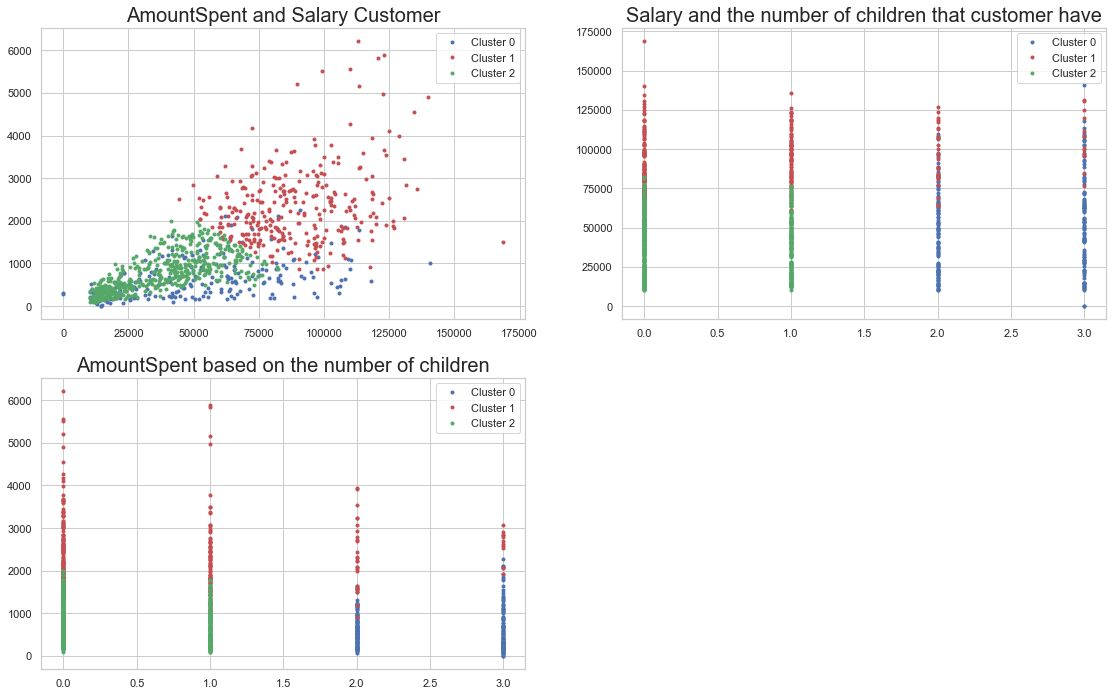

In [127]:
a = plt.figure( figsize = (17,17))

plt.subplot(3, 2, 1)
a_0 = plt.plot(df_params['Salary'][df_params['Cluster'] == 0], df_params['AmountSpent'][df_params['Cluster'] == 0], 'b.')
a_1 = plt.plot(df_params['Salary'][df_params['Cluster'] == 1], df_params['AmountSpent'][df_params['Cluster'] == 1], 'r.')
a_2 = plt.plot(df_params['Salary'][df_params['Cluster'] == 2], df_params['AmountSpent'][df_params['Cluster'] == 2], 'g.')
plt.legend(('Cluster 0', 'Cluster 1', 'Cluster 2'), loc='best')
plt.title('AmountSpent and Salary Customer', fontsize = 20)

plt.subplot(3, 2, 2)
b_0 = plt.plot(df_params['Children'][df_params['Cluster'] == 0], df_params['Salary'][df_params['Cluster'] == 0], 'b.')
b_1 = plt.plot(df_params['Children'][df_params['Cluster'] == 1], df_params['Salary'][df_params['Cluster'] == 1], 'r.')
b_2 = plt.plot(df_params['Children'][df_params['Cluster'] == 2], df_params['Salary'][df_params['Cluster'] == 2], 'g.')
plt.legend(('Cluster 0', 'Cluster 1', 'Cluster 2'), loc='best')
plt.title('Salary and the number of children that customer have', fontsize = 20)

plt.subplot(3, 2, 3)
c_0 = plt.plot(df_params['Children'][df_params['Cluster'] == 0], df_params['AmountSpent'][df_params['Cluster'] == 0], 'b.')
c_1 = plt.plot(df_params['Children'][df_params['Cluster'] == 1], df_params['AmountSpent'][df_params['Cluster'] == 1], 'r.')
c_2 = plt.plot(df_params['Children'][df_params['Cluster'] == 2], df_params['AmountSpent'][df_params['Cluster'] == 2], 'g.')
plt.legend(('Cluster 0', 'Cluster 1', 'Cluster 2'), loc='best')
plt.title('AmountSpent based on the number of children', fontsize = 20)



# plt.subplot(3, 2, 3)
# sns.countplot('Checking account', data = df, hue = 'Purpose')

plt.tight_layout(pad=2, h_pad=1, w_pad=1, rect=(3,100,10,3))
a.savefig('2d.png')

In [128]:
from mpl_toolkits.mplot3d import Axes3D

K-MEANS


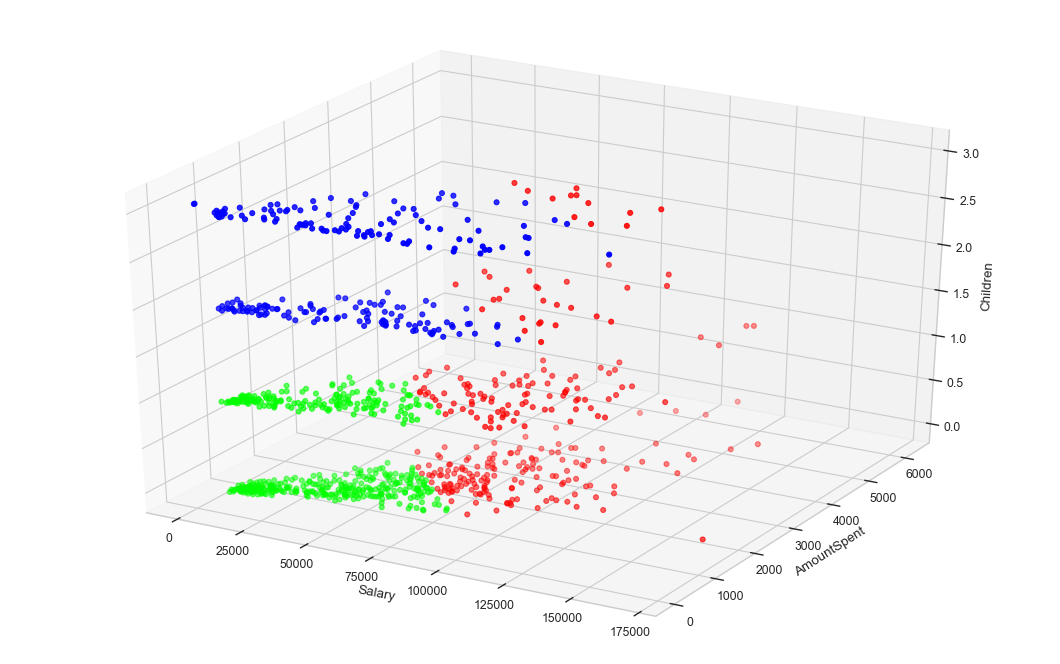

In [129]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df['Salary'],df['AmountSpent'],df['Children'],c=df_params['Cluster'], cmap='brg')

xLabel = ax.set_xlabel('Salary', linespacing=3.2)
yLabel = ax.set_ylabel('AmountSpent', linespacing=3.1)
zLabel = ax.set_zlabel('Children', linespacing=3.4)

print("K-MEANS")
fig.savefig('3d.png')

### DBSCAN Clustering

In [88]:
from sklearn.cluster import DBSCAN 

In [130]:
db_default = DBSCAN(eps = 0.5, min_samples = 4).fit(df_params[['Salary_scl', 'AmountSpent_scl', 'Children_scl']]) 
labels = db_default.labels_

In [131]:
pd.DataFrame(labels)[0].unique()

array([ 0,  1,  2, -1,  3,  4,  5])

In [132]:
from mpl_toolkits.mplot3d import Axes3D

DBSCAN


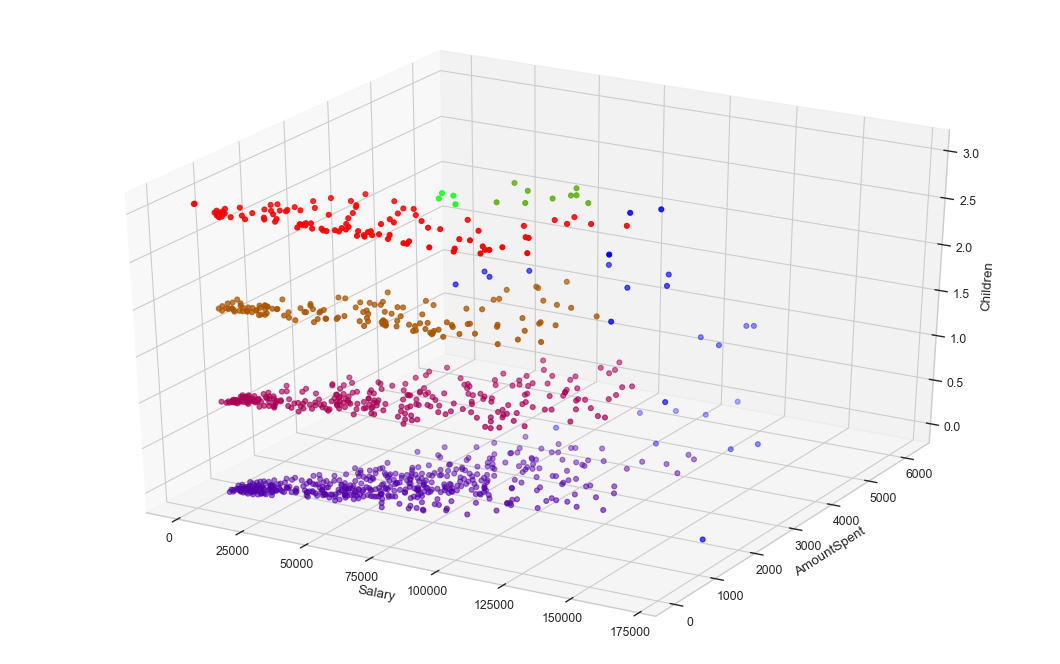

In [134]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df['Salary'],df['AmountSpent'],df['Children'],c=labels, cmap='brg')

xLabel = ax.set_xlabel('Salary', linespacing=3.2)
yLabel = ax.set_ylabel('AmountSpent', linespacing=3.1)
zLabel = ax.set_zlabel('Children', linespacing=3.4)

print("DBSCAN")

In [135]:
kmeans_labels = model_KM.labels_

In [136]:
df_clustered = df.assign(Cluster=kmeans_labels)

In [137]:
df_clustered.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,AmountSpent,Cluster
0,Old,Female,Own,Single,Far,47500,0,755.0,2
1,Middle,Male,Rent,Single,Close,63600,0,1318.0,2
2,Young,Female,Rent,Single,Close,13500,0,296.0,2
3,Middle,Male,Own,Married,Close,85600,1,2436.0,1
4,Middle,Female,Own,Single,Close,68400,0,1304.0,2


In [138]:
grouped_kmeans = df_clustered.groupby(['Cluster'])
grouped_kmeans.mean().round(1)

,Salary,Children,AmountSpent
Cluster,,,
0,50814.5,2.5,628.1
1,88813.9,0.6,2347.0
2,37946.3,0.4,793.2


In [139]:
df_params.describe()

,Salary,AmountSpent,Children,mahala_pack,p-value,Salary_scl,AmountSpent_scl,Children_scl,Cluster
count,994.000000,994.000000,994.000000,994.000000,994.000000,9.940000e+02,9.940000e+02,9.940000e+02,994.000000
mean,56032.696177,1218.188129,0.924547,1.574751,0.481117,-9.675359e-18,4.099113e-17,5.178342e-17,1.245473
std,30722.419449,961.849079,1.046425,0.721583,0.145794,1.000503e+00,1.000503e+00,1.000503e+00,0.801625
min,0.000000,0.000000,0.000000,0.150273,0.053310,-1.824755e+00,-1.267144e+00,-8.839739e-01,0.000000
25%,29600.000000,490.250000,0.000000,1.121413,0.377723,-8.608047e-01,-7.571921e-01,-8.839739e-01,1.000000
50%,53700.000000,962.500000,1.000000,1.418129,0.492104,-7.596636e-02,-2.659636e-01,7.214150e-02,1.000000
75%,76975.000000,1688.750000,2.000000,1.947186,0.570806,6.820051e-01,4.894726e-01,1.028257e+00,2.000000
max,168800.000000,6217.000000,3.000000,5.863277,0.927617,3.672369e+00,5.199702e+00,1.984372e+00,2.000000


In [140]:
grouped_kmeans.get_group(0).min()

Age             Middle
Gender          Female
OwnHome            Own
Married        Married
Location         Close
Salary               0
Children             2
AmountSpent          0
Cluster              0
dtype: object

In [142]:
grouped_kmeans.get_group(1).min()

Age             Middle
Gender          Female
OwnHome            Own
Married        Married
Location         Close
Salary           44200
Children             0
AmountSpent        863
Cluster              1
dtype: object

In [143]:
grouped_kmeans.get_group(2).min()

Age             Middle
Gender          Female
OwnHome            Own
Married        Married
Location         Close
Salary           10100
Children             0
AmountSpent         90
Cluster              2
dtype: object

In [141]:
grouped_kmeans.get_group(0).max()

Age             Young
Gender           Male
OwnHome          Rent
Married        Single
Location          Far
Salary         140700
Children            3
AmountSpent      2265
Cluster             0
dtype: object

In [144]:
grouped_kmeans.get_group(1).max()

Age             Young
Gender           Male
OwnHome          Rent
Married        Single
Location          Far
Salary         168800
Children            3
AmountSpent      6217
Cluster             1
dtype: object

In [145]:
grouped_kmeans.get_group(2).max()

Age             Young
Gender           Male
OwnHome          Rent
Married        Single
Location          Far
Salary          82500
Children            1
AmountSpent      1985
Cluster             2
dtype: object

# Target for Marketing Team

In [159]:
Targeting = pd.DataFrame({'Cluster': ['Cluster 0', 'Cluster 1','Cluster 2'], 'Salary_Min': [41, 21, 19], 'Salary_Max': [140700, 168800, 82500],
             'AmountSpent_Min': [0, 863, 90], 'AmountSpent_Max': [2265, 6217, 1985], 'Children_Min': [2, 0, 0], 'Children_Max': [3, 3, 1]})


In [160]:
Targeting

,Cluster,Salary_Min,Salary_Max,AmountSpent_Min,AmountSpent_Max,Children_Min,Children_Max
0,Cluster 0,41,140700,0,2265,2,3
1,Cluster 1,21,168800,863,6217,0,3
2,Cluster 2,19,82500,90,1985,0,1


In [164]:
def label(data):
    if data == 0:
        return 'Silver'
    if data == 1:
        return 'Gold'
    if data == 2:
        return 'Platinum'

In [166]:
df_clustered['TargetPriority'] = df_clustered['Cluster'].apply(label)

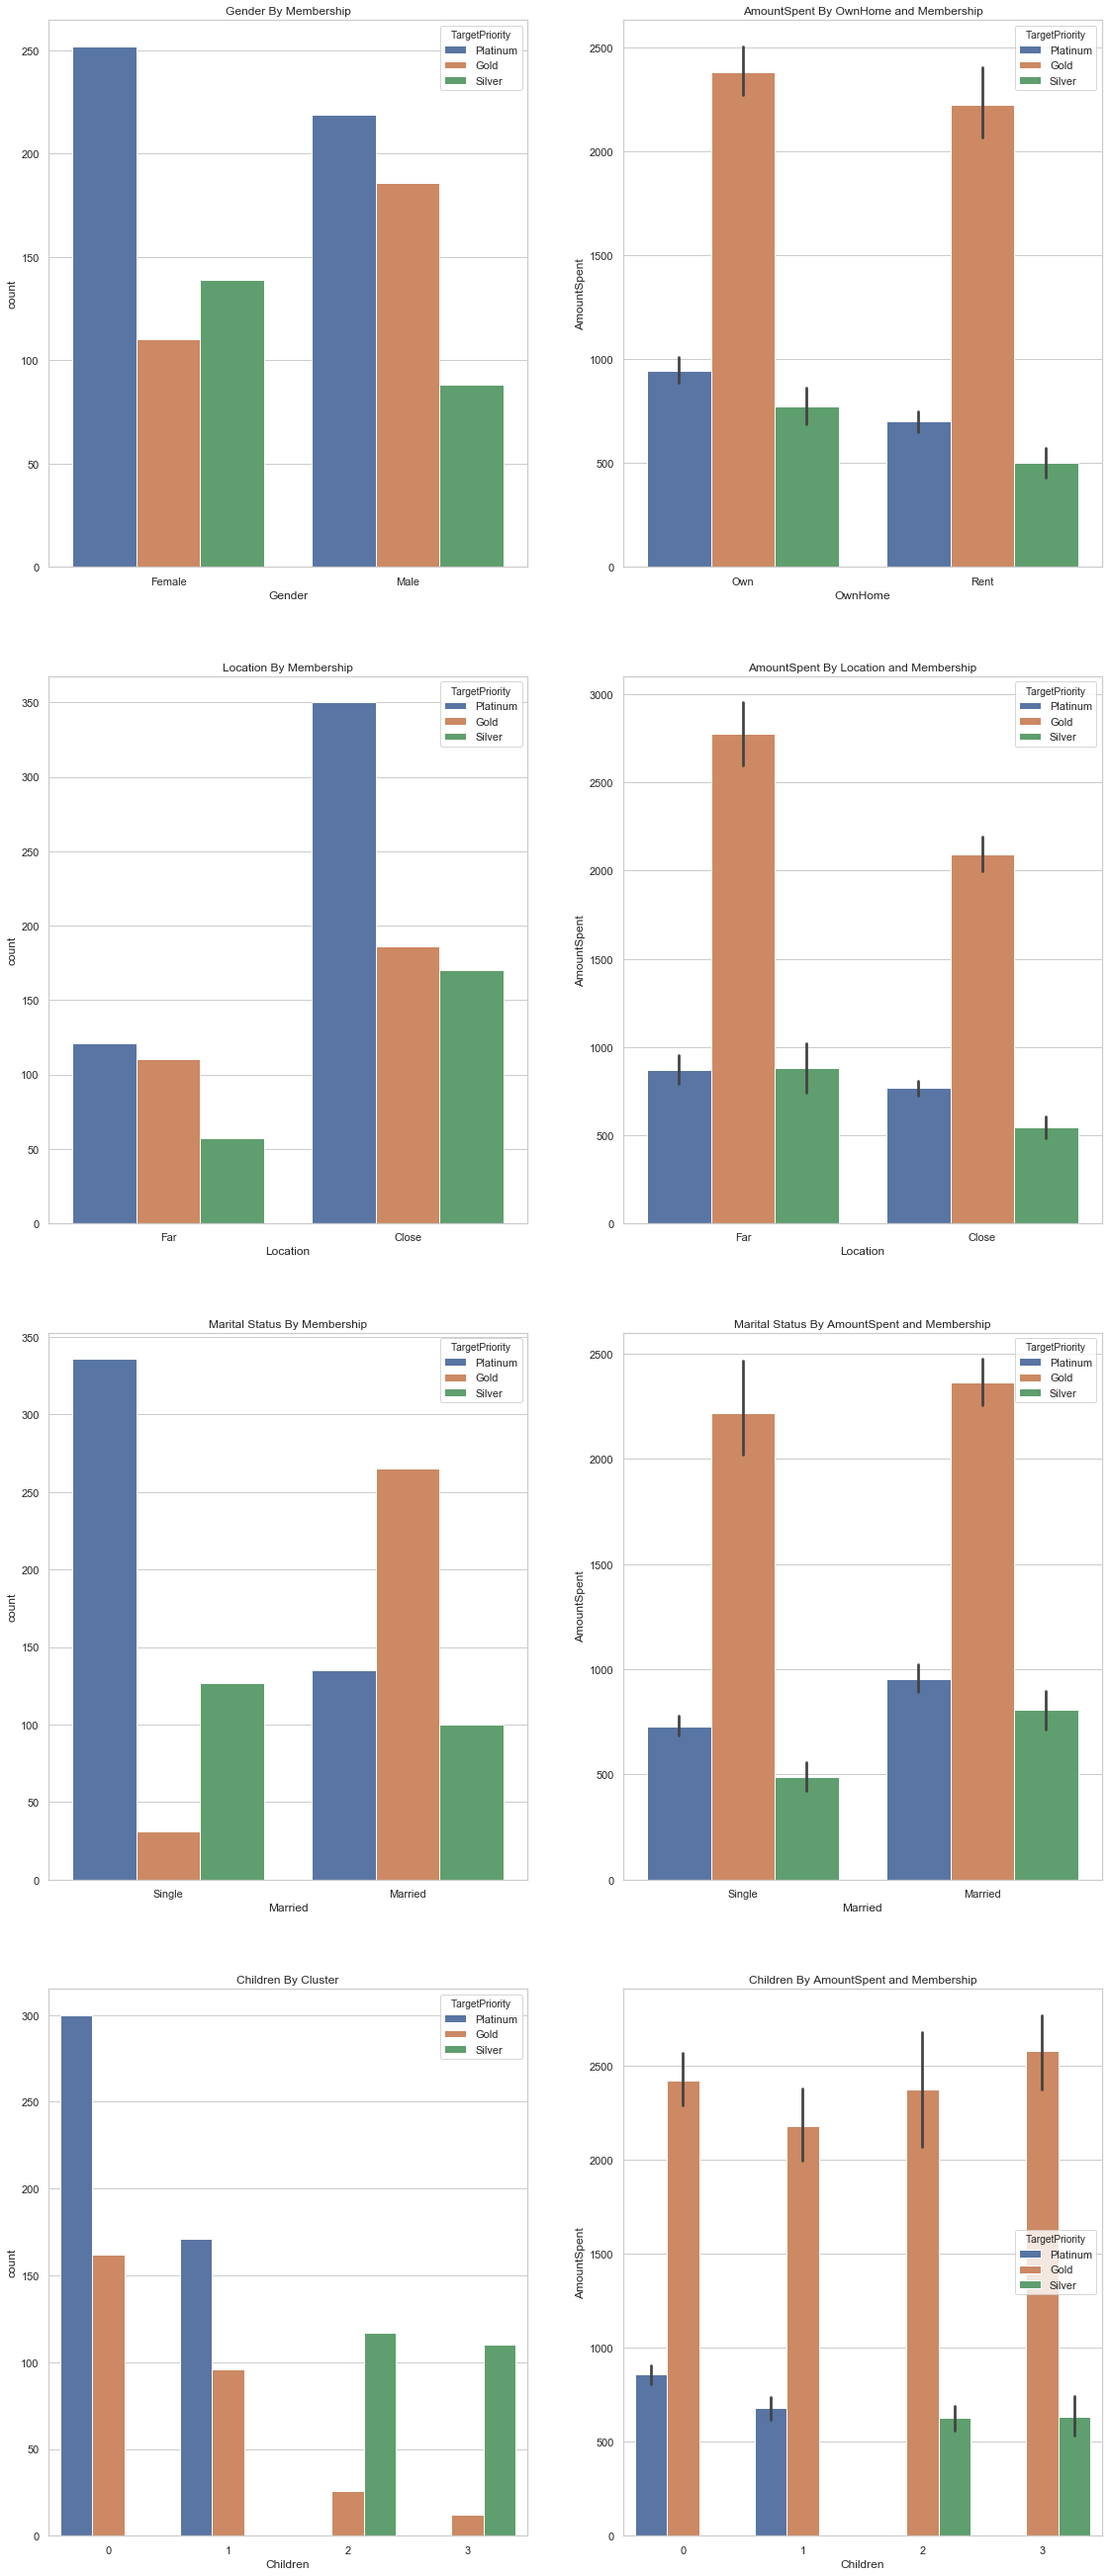

In [167]:
a = plt.figure( figsize = (17,55))

plt.subplot(5, 2, 1)
chart = sns.countplot('Gender', data = df_clustered, hue = 'TargetPriority')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Gender By Membership')

plt.subplot(5, 2, 2)
box = sns.barplot(x = 'OwnHome',y = 'AmountSpent', hue = 'TargetPriority', data=df_clustered)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent By OwnHome and Membership')

plt.subplot(5, 2, 3)
chart = sns.countplot('Location', data = df_clustered, hue = 'TargetPriority')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Location By Membership')

plt.subplot(5, 2, 4)
box = sns.barplot(x = 'Location',y = 'AmountSpent', hue = 'TargetPriority', data=df_clustered)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent By Location and Membership')

plt.subplot(5, 2, 5)
chart = sns.countplot('Married', data = df_clustered, hue = 'TargetPriority')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Marital Status By Membership')

plt.subplot(5, 2, 6)
box = sns.barplot(x = 'Married',y = 'AmountSpent', hue = 'TargetPriority', data=df_clustered)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('Marital Status By AmountSpent and Membership')

plt.subplot(5, 2, 7)
chart = sns.countplot('Children', data = df_clustered, hue = 'TargetPriority')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Children By Cluster')

plt.subplot(5, 2, 8)
box = sns.barplot(x = 'Children',y = 'AmountSpent', hue = 'TargetPriority', data=df_clustered)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('Children By AmountSpent and Membership')


plt.tight_layout(pad=2, h_pad=1, w_pad=1, rect=(3,100,10,3))
a.savefig('catclus.png')